# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score






# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [21]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]

df_classification = pd.read_csv('data_clustering.csv')
print("Dataset 'data_clustering.csv' berhasil dimuat.")
print(f"Bentuk dataset (baris, kolom): {df_classification.shape}")


Dataset 'data_clustering.csv' berhasil dimuat.
Bentuk dataset (baris, kolom): (2513, 10)


**Metode yang digunakan:**
fungsi .head()

**Alasan penggunaan:**
Akses ke Data Terstruktur: Memuat data ke dalam DataFrame Pandas memungkinkan akses dan manipulasi data yang mudah dan efisien. Semua operasi pra-pemrosesan, pembagian data, pelatihan model, dan evaluasi akan dilakukan pada DataFrame ini.

**Hasil yang didapat:**
pesan konfirmasi bahwa dataset telah dimuat, bentuk DataFrame (jumlah baris dan kolom), dan lima baris pertama dari dataset tersebut untuk verifikasi cepat.

In [22]:
# Tampilkan 5 baris pertama dengan function head.
print("Lima baris pertama dataset:")
print(df_classification.head())

Lima baris pertama dataset:
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.970546                1        36        0     1.419862   
1           0.268963                1        15        0     1.307715   
2          -0.586526                1        23        2    -1.439874   
3          -0.387294                1        33        2    -1.047361   
4          -0.972736                0         1        2     0.018031   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0            -0.548393      -0.204629       -0.000315   
1                   0             0.307960      -0.204629        2.218381   
2                   3            -0.905207      -0.204629       -1.024091   
3                   3            -1.347656      -0.204629        0.886694   
4                   3             1.121495      -0.204629        0.594263   

   Target  
0       2  
1       1  
2       0  
3       2  
4       3 

# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

**Metode yang digunakan:**

sklearn.model_selection.train_test_split(): Ini adalah fungsi utama dari pustaka scikit-learn yang digunakan untuk membagi array atau matriks menjadi subset pelatihan dan pengujian acak.

**Alasan penggunaan:**

Evaluasi Model Objektif: Tujuan utama dari pembagian data menjadi training dan testing set adalah untuk mengevaluasi kinerja model secara objektif. Model dilatih hanya pada data training, dan kemudian dievaluasi pada data testing yang "belum pernah dilihat" oleh model. Ini membantu memperkirakan bagaimana model akan bekerja pada data baru di dunia nyata.

**Hasil yang didapat:**
Fungsi train_test_split akan mengembalikan empat objek:
1. X_train: Fitur-fitur yang akan digunakan untuk melatih model.
2. X_test: Fitur-fitur yang akan digunakan untuk menguji model.
3. y_train: Label target yang sesuai dengan X_train.
4. y_test: Label target yang sesuai dengan X_test.

In [23]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.

print("--- Memulai Pembagian Dataset ---")

# Definisikan fitur (X) dan target (y)
# X akan berisi semua kolom kecuali 'Target'
X = df_classification.drop('Target', axis=1)

# y akan berisi kolom 'Target' (label cluster)
y = df_classification['Target']

print(f"Jumlah total sampel: {len(X)}")
print(f"Jumlah fitur (kolom X): {X.shape[1]}")
print(f"Jumlah label target unik (kolom y): {y.nunique()}")
print(f"Distribusi label target:\n{y.value_counts()}")

# Bagi data menjadi training set dan testing set
# test_size=0.20 berarti 20% data akan digunakan untuk testing, 80% untuk training
# random_state untuk memastikan hasil pembagian konsisten setiap kali kode dijalankan
# stratify=y penting untuk klasifikasi agar distribusi kelas di training dan test set serupa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("\nPembagian Dataset Selesai:")
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_test: {y_test.shape}")

print("\nDistribusi label di Training Set:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi label di Testing Set:")
print(y_test.value_counts(normalize=True))

--- Memulai Pembagian Dataset ---
Jumlah total sampel: 2513
Jumlah fitur (kolom X): 9
Jumlah label target unik (kolom y): 4
Distribusi label target:
Target
1    649
0    648
3    619
2    597
Name: count, dtype: int64

Pembagian Dataset Selesai:
Ukuran X_train: (2010, 9)
Ukuran y_train: (2010,)
Ukuran X_test: (503, 9)
Ukuran y_test: (503,)

Distribusi label di Training Set:
Target
1    0.258209
0    0.257711
3    0.246269
2    0.237811
Name: proportion, dtype: float64

Distribusi label di Testing Set:
Target
0    0.258449
1    0.258449
3    0.246521
2    0.236581
Name: proportion, dtype: float64


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.


---

**Metode yang digunakan:**

sklearn.tree.DecisionTreeClassifier: Ini adalah kelas dari pustaka scikit-learn yang mengimplementasikan algoritma pohon keputusan untuk tugas klasifikasi. Pohon keputusan bekerja dengan memecah data berdasarkan fitur-fitur, membentuk serangkaian aturan if-else yang mengarah pada prediksi kelas.

**Alasan penggunaan:**

Algoritma yang Kuat dan Mudah Diinterpretasi: Decision Tree adalah algoritma klasifikasi yang populer karena kemampuannya menangani berbagai jenis data dan, yang terpenting, karena hasil keputusannya yang relatif mudah diinterpretasi.

**Hasil yang didapat:**

Model dt_classifier yang Terlatih: Sebuah objek DecisionTreeClassifier yang telah "belajar" dari X_train dan y_train akan tersedia di memori. Model ini sekarang mampu menerima data fitur baru dan memprediksi cluster targetnya.

In [24]:
# Buatlah model klasifikasi menggunakan Decision Tree


print("--- Memulai Pembangunan dan Pelatihan Model Klasifikasi (Decision Tree) ---")

# Menginisialisasi Model Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

print("\nModel Decision Tree Classifier berhasil diinisialisasi.")

# Melatih Model (Fitting the model) menggunakan data training
dt_classifier.fit(X_train, y_train)

print("Model Decision Tree Classifier berhasil dilatih menggunakan data training.")

--- Memulai Pembangunan dan Pelatihan Model Klasifikasi (Decision Tree) ---

Model Decision Tree Classifier berhasil diinisialisasi.
Model Decision Tree Classifier berhasil dilatih menggunakan data training.


**Metode yang digunakan:**
joblib.dump(model, filename)


**Alasan penggunaan:**

Penyimpanan Model: Menyimpan model yang telah dilatih dengan joblib.dump() sangat penting untuk penggunaan di masa mendatang. Tidak perlu melatih ulang model setiap kali ingin menggunakannya untuk prediksi atau evaluasi. Ini menghemat waktu dan sumber daya komputasi.

**Hasil yang didapat:**

File Model (decision_tree_model.h5): Sebuah file biner bernama decision_tree_model.h5 akan disimpan di direktori. File ini berisi representasi model Decision Tree yang sudah terlatih, siap untuk dimuat kembali kapan saja.

In [25]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')

model_filename = "decision_tree_model.h5"
joblib.dump(dt_classifier, model_filename)
print(f"\nModel Decision Tree berhasil disimpan ke '{model_filename}'")

print("\n--- Model Klasifikasi Selesai Dibangun dan Dilatih ---")


Model Decision Tree berhasil disimpan ke 'decision_tree_model.h5'

--- Model Klasifikasi Selesai Dibangun dan Dilatih ---


**Metode yang digunakan:**
Menampilkan Metrik Klasifikasi (Akurasi, Presisi, Recall, F1-Score)

**Alasan penggunaan:**
Pengukuran Kinerja Model: Metrik seperti akurasi, presisi, recall, dan F1-score sangat penting untuk memahami seberapa baik model klasifikasi bekerja.
1. Akurasi: Seberapa sering model membuat prediksi yang benar secara keseluruhan.
2. Presisi: Dari semua prediksi positif untuk suatu kelas, berapa banyak yang sebenarnya benar. Penting ketika biaya false positives tinggi.
3. Recall (Sensitivitas): Dari semua sampel yang sebenarnya milik suatu kelas, berapa banyak yang berhasil diidentifikasi oleh model. Penting ketika biaya false negatives tinggi.
4. F1-Score: Rata-rata harmonik dari presisi dan recall, memberikan keseimbangan antara keduanya, sangat berguna ketika ada ketidakseimbangan kelas.

**Hasil yang didapat:**
Laporan Klasifikasi: Output teks di konsol yang menampilkan presisi, recall, dan F1-score untuk setiap label cluster (0, 1, 2, 3), serta akurasi makro dan bobot rata-rata.

Prediksi pada data testing selesai.

Laporan Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       130
           2       1.00      1.00      1.00       119
           3       1.00      1.00      1.00       124

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

Akurasi Model: 1.0000

--- Confusion Matrix ---


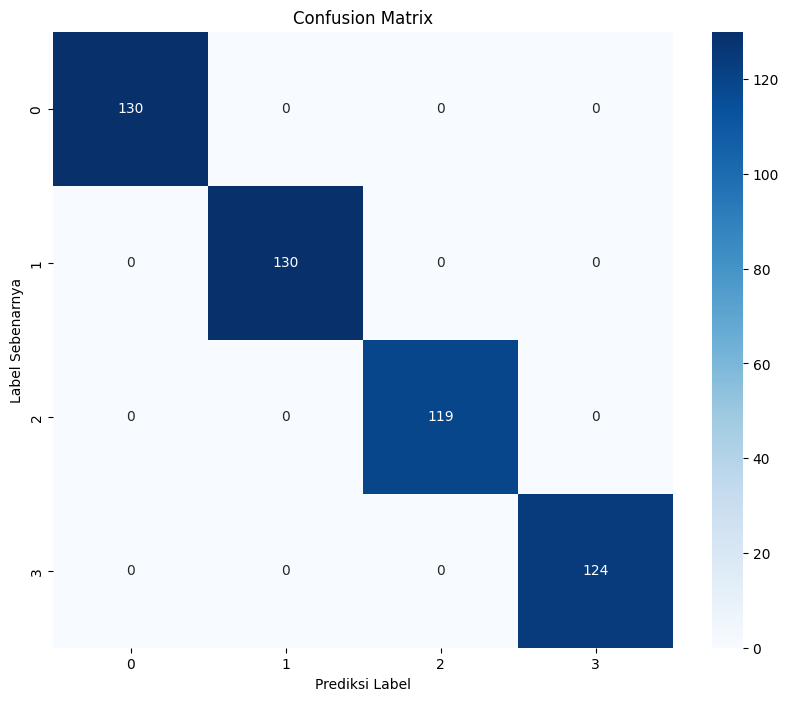

In [26]:
# Melakukan prediksi pada data testing
y_pred = dt_classifier.predict(X_test)

print("Prediksi pada data testing selesai.")

# Menampilkan Metrik Klasifikasi (Akurasi, Presisi, Recall, F1-Score)
print("\nLaporan Decision Tree")
print(classification_report(y_test, y_pred))

# Menampilkan Akurasi Saja
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

# Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Prediksi Label')
plt.ylabel('Label Sebenarnya')
plt.show()

kinerja 100% akurat adalah hal yang tidak wajar dan sangat mencurigakan dalam konteks machine learning dunia nyata. Dibuktikan dengan precision, recall, f1-score 1.00, dan confusion matrix diagonal penuh.

Dugaan:

1. Overfitting
2. Data training dan testing tidak terpisah cukup baik
3. Pola data terlalu mudah dibaca

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

---

**Metode yang digunakan:**

Random Forest membangun banyak pohon keputusan dan menggabungkan prediksinya untuk hasil yang lebih kuat dan stabil.

**Alasan penggunaan:**

Random Forest secara inheren dirancang untuk mengurangi overfitting yang merupakan masalah umum pada Decision Tree tunggal. Dengan menggabungkan hasil dari banyak pohon yang dilatih secara independen, model menjadi lebih kuat dan generalisasi pada data baru akan lebih baik.

**Hasil yang didapat:**

File Model: Sebuah file biner bernama random_forest_model.h5 akan disimpan di direktori. File ini berisi model Random Forest yang sudah terlatih.


In [27]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.


# Menginisialisasi Model Random Forest Classifier
# random_state=42 untuk reproduktibilitas hasil
# n_estimators: jumlah pohon dalam forest
# Bisa nambah hyperparameter lain di sini, seperti max_depth, min_samples_leaf, dll.
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

print("\nModel Random Forest Classifier berhasil diinisialisasi.")

# Melatih Model (Fitting the model) menggunakan data training
rf_classifier.fit(X_train, y_train)

print("Model Random Forest Classifier berhasil dilatih menggunakan data training.")


Model Random Forest Classifier berhasil diinisialisasi.
Model Random Forest Classifier berhasil dilatih menggunakan data training.


**Metode yang digunakan:**
Menampilkan Metrik Klasifikasi (Akurasi, Presisi, Recall, F1-Score)

**Alasan penggunaan:**
Pengukuran Kinerja Model: Metrik seperti akurasi, presisi, recall, dan F1-score sangat penting untuk memahami seberapa baik model klasifikasi bekerja.
1. Akurasi: Seberapa sering model membuat prediksi yang benar secara keseluruhan.
2. Presisi: Dari semua prediksi positif untuk suatu kelas, berapa banyak yang sebenarnya benar. Penting ketika biaya false positives tinggi.
3. Recall (Sensitivitas): Dari semua sampel yang sebenarnya milik suatu kelas, berapa banyak yang berhasil diidentifikasi oleh model. Penting ketika biaya false negatives tinggi.
4. F1-Score: Rata-rata harmonik dari presisi dan recall, memberikan keseimbangan antara keduanya, sangat berguna ketika ada ketidakseimbangan kelas.

**Hasil yang didapat:**
Laporan Klasifikasi: Output teks di konsol yang menampilkan presisi, recall, dan F1-score untuk setiap label cluster (0, 1, 2, 3), serta akurasi makro dan bobot rata-rata.

Memulai Evaluasi Model Klasifikasi Random Forest

Prediksi pada data testing selesai.

Laporan Klasifikasi Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       130
           2       1.00      1.00      1.00       119
           3       1.00      1.00      1.00       124

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503

Akurasi Model Random Forest: 1.0000

--- Confusion Matrix (Random Forest) ---
[[130   0   0   0]
 [  0 130   0   0]
 [  0   0 119   0]
 [  0   0   0 124]]


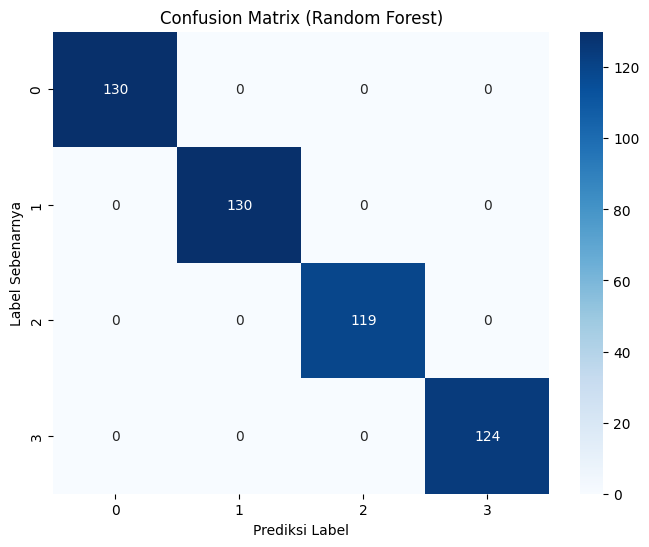

In [28]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.

print("Memulai Evaluasi Model Klasifikasi Random Forest")

# Melakukan prediksi pada data testing
y_pred_rf = rf_classifier.predict(X_test)
print("\nPrediksi pada data testing selesai.")

# Menampilkan Metrik Klasifikasi (Akurasi, Presisi, Recall, F1-Score)
print("\nLaporan Klasifikasi Random Forest")
print(classification_report(y_test, y_pred_rf))

# Menampilkan Akurasi Saja (secara eksplisit)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Model Random Forest: {accuracy_rf:.4f}")

# Menampilkan Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\n--- Confusion Matrix (Random Forest) ---")
print(cm_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Prediksi Label')
plt.ylabel('Label Sebenarnya')
plt.show()

Hasil evaluasi masih sama dan dugaan juga masih sama


---



In [29]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')

model_filename_rf = "explore_random forest_classification.h5"
joblib.dump(rf_classifier, model_filename_rf)
print(f"\nModel Random Forest berhasil disimpan ke '{model_filename_rf}'")


Model Random Forest berhasil disimpan ke 'explore_random forest_classification.h5'


Analisis untuk mencari penyebab akurasi tingi pada model random forest.
1. Analisis korelasi fitur
2. Analisis feature importance.
3. Analisis cross validation


---





**Metode yang digunakan:**
1. Analisi korelasi fitur


**Alasan penggunaan:**

Mendeteksi Korelasi yang Sangat Kuat: Jika ada fitur numerik yang memiliki koefisien korelasi yang sangat dekat dengan 1 atau -1 dengan kolom Target, itu adalah indikator kuat adanya kebocoran data atau fitur yang terlalu mendominasi dalam menentukan cluster. Model klasifikasi dapat dengan mudah "mempelajari" hubungan ini, menyebabkan akurasi sempurna yang tidak realistis.

**Hasil yang didapat:**

Tidak ada satupun fitur numerik yang menunjukkan korelasi ekstrem yaitu mendekati 1 atau -1 dengan Target. Korelasi tertinggi adalah Location dengan -0.40, yang merupakan korelasi moderat, bukan indikasi kebocoran data langsung. Fitur numerik lainnya memiliki korelasi yang sangat rendah. Ini menunjukkan bahwa masalah tidak terletak pada korelasi langsung fitur numerik dengan target.

Memulai Analisis Korelasi Fitur dengan Target

Korelasi Fitur Numerik dengan 'Target':
Target                 1.000000
Channel                0.023595
TransactionType        0.016482
AccountBalance         0.008882
CustomerAge            0.005708
TransactionAmount     -0.013052
CustomerOccupation    -0.014097
TransactionDuration   -0.015323
LoginAttempts         -0.021205
Location              -0.395574
Name: Target, dtype: float64

Visualisasi Korelasi (Heatmap)


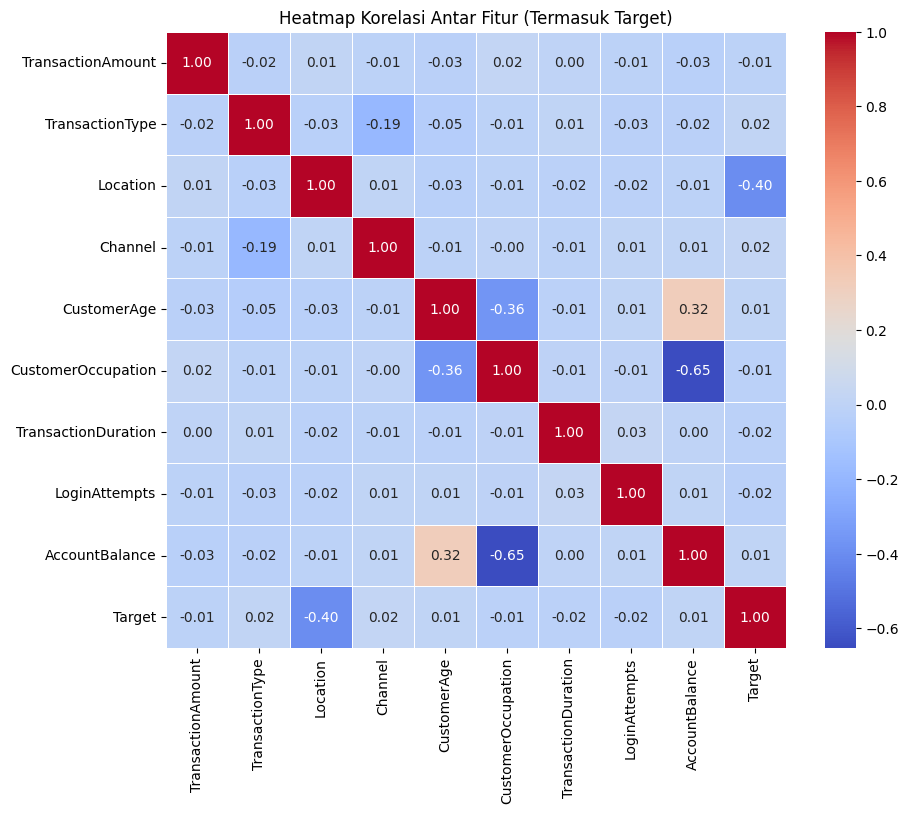

In [30]:
print("Memulai Analisis Korelasi Fitur dengan Target")

# Menghitung korelasi antara setiap fitur numerik dan kolom 'Target'
# Pastikan 'Target' adalah numerik (label cluster harus sudah berupa angka)
# Dalam kasus kita, label cluster (0, 1, 2, 3) sudah numerik, jadi aman.

# Pilih hanya kolom numerik untuk korelasi dengan target
numeric_cols_for_corr = df_classification.select_dtypes(include=['number']).columns.tolist()

# Pastikan 'Target' ada di dalam list kolom numerik
if 'Target' in numeric_cols_for_corr:
    # Korelasi hanya untuk fitur numerik dengan target
    correlations = df_classification[numeric_cols_for_corr].corr()['Target'].sort_values(ascending=False)
else:
    print("Kolom 'Target' tidak ditemukan atau bukan numerik. Korelasi tidak dapat dihitung.")
    correlations = pd.Series()

print("\nKorelasi Fitur Numerik dengan 'Target':")
print(correlations)

print("\nVisualisasi Korelasi (Heatmap)")
# Menghitung matriks korelasi penuh untuk semua kolom numerik termasuk target
plt.figure(figsize=(10, 8))
sns.heatmap(df_classification[numeric_cols_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Fitur (Termasuk Target)')
plt.show()

**Metode yang digunakan:**
2. Analisis feature importance


**Alasan penggunaan:**

Mengidentifikasi Fitur Kunci yang Terlalu Dominan: Jika satu atau dua fitur memiliki feature_importances_ yang sangat tinggi (mendekati 1.0) dan jauh melebihi fitur lainnya, ini bisa menjadi indikasi bahwa model hanya mengandalkan fitur tersebut untuk membuat prediksi. Hal ini bisa terjadi jika ada kebocoran data, atau jika klaster Anda sangat mudah dipisahkan oleh satu atau dua fitur saja.

**Hasil yang didapat:**

Fitur Location memiliki kepentingan fitur yang luar biasa tinggi 0.9147, sedangkan semua fitur lainnya memiliki kepentingan yang sangat, sangat rendah di bawah 0.02.

Ini berarti model Decision Tree dan Random Forest hampir secara eksklusif menggunakan fitur Location untuk memprediksi Target label cluster. Ini menunjukkan bahwa cluster hampir sepenuhnya atau sepenuhnya ditentukan oleh nilai-nilai di kolom Location.


Analisis Feature Importance dari Random Forest

Feature Importance dari Random Forest:
               Feature  Importance
2             Location    0.914700
0    TransactionAmount    0.019304
8       AccountBalance    0.018750
6  TransactionDuration    0.018268
4          CustomerAge    0.014679
3              Channel    0.005025
5   CustomerOccupation    0.004433
1      TransactionType    0.002605
7        LoginAttempts    0.002236


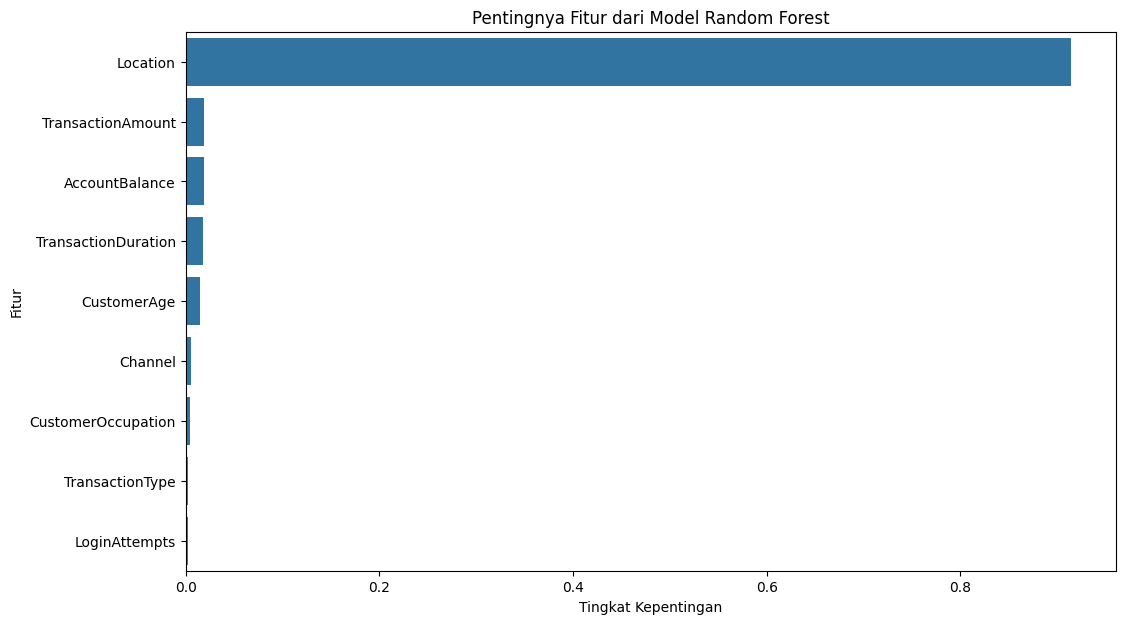

In [31]:
print("\nAnalisis Feature Importance dari Random Forest")

# Pastikan model Random Forest sudah terlatih
if 'rf_classifier' in locals() and hasattr(rf_classifier, 'feature_importances_'):
    # Dapatkan feature importances dari model Random Forest
    importances = rf_classifier.feature_importances_

    # Dapatkan nama fitur dari X_train
    feature_names = X_train.columns

    # Buat DataFrame untuk visualisasi
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print("\nFeature Importance dari Random Forest:")
    print(feature_importance_df)

    # Visualisasi Feature Importance
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Pentingnya Fitur dari Model Random Forest')
    plt.xlabel('Tingkat Kepentingan')
    plt.ylabel('Fitur')
    plt.show()

else:
    print("Model Random Forest (rf_classifier) belum dilatih atau tidak memiliki atribut feature_importances_.")




**Metode yang digunakan: **
3. Analisis cross validation


**Alasan penggunaan:**

Mendeteksi Overfitting pada Pembagian Tertentu: Jika akurasi model pada cross-validation jauh lebih rendah dari 100% yang Anda dapatkan sebelumnya pada pembagian train/test tunggal, itu akan mengonfirmasi bahwa model Anda overfit pada pembagian spesifik tersebut atau bahwa pembagian data tunggal tersebut sangat "mudah"

**Hasil yang didapat:**

Output  menunjukkan bahwa model random forest mencapai akurasi dan F1-Score 100% di setiap lipatan atau fold dari 5-fold Stratified Cross-Validation, dengan standar deviasi 0.0000.

Hal ini menunjukkan bahwa keseluruhan dataset sangat mudah dipisahkan oleh fitur-fitur yang ada, terutama Location. Model random forest disini mempelajari pola yang memang ada yaitu klaster yang sangat terpisah oleh Location dengan sempurna.


In [32]:
print("Memulai Cross-Validation untuk Random Forest")

# 1. Menginisialisasi model Random Forest (dengan random_state yang sama)
# Kita bisa menggunakan parameter default untuk n_estimators (100) atau menentukannya secara eksplisit.
rf_classifier_cv = RandomForestClassifier(random_state=42, n_estimators=100)

# 2. Menginisialisasi Stratified K-Fold Cross-Validation
# n_splits=5 berarti data akan dibagi menjadi 5 lipatan.
# shuffle=True memastikan data diacak sebelum dibagi.
# random_state=42 untuk reproduktibilitas pembagian lipatan.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"\nMelakukan 5-fold Stratified Cross-Validation untuk Akurasi")

# 3. Melakukan cross-validation
# scoring='accuracy' berarti kita akan mengukur akurasi pada setiap lipatan.
cv_scores_accuracy = cross_val_score(rf_classifier_cv, X, y, cv=cv_strategy, scoring='accuracy', n_jobs=-1)

print(f"Skor Akurasi per fold: {cv_scores_accuracy}")
print(f"Rata-rata Akurasi Cross-Validation: {np.mean(cv_scores_accuracy):.4f}")
print(f"Standar Deviasi Akurasi Cross-Validation: {np.std(cv_scores_accuracy):.4f}")

# Kita juga bisa mendapatkan metrik lain seperti F1-score (weighted)
print(f"\nMelakukan 5-fold Stratified Cross-Validation untuk F1-Score (weighted)...")
cv_scores_f1_weighted = cross_val_score(rf_classifier_cv, X, y, cv=cv_strategy, scoring='f1_weighted', n_jobs=-1)

print(f"Skor F1-Score (weighted) per fold: {cv_scores_f1_weighted}")
print(f"Rata-rata F1-Score (weighted) Cross-Validation: {np.mean(cv_scores_f1_weighted):.4f}")
print(f"Standar Deviasi F1-Score (weighted) Cross-Validation: {np.std(cv_scores_f1_weighted):.4f}")

Memulai Cross-Validation untuk Random Forest

Melakukan 5-fold Stratified Cross-Validation untuk Akurasi
Skor Akurasi per fold: [1. 1. 1. 1. 1.]
Rata-rata Akurasi Cross-Validation: 1.0000
Standar Deviasi Akurasi Cross-Validation: 0.0000

Melakukan 5-fold Stratified Cross-Validation untuk F1-Score (weighted)...
Skor F1-Score (weighted) per fold: [1. 1. 1. 1. 1.]
Rata-rata F1-Score (weighted) Cross-Validation: 1.0000
Standar Deviasi F1-Score (weighted) Cross-Validation: 0.0000


Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [33]:
# Lakukan Hyperparameter Tuning dan Latih ulang.

In [34]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(model_dt, 'tuning_classification.h5')